## Plot the nu, e, and $\lambda$ distributions for the selected samples in DES, Buzzard, and Cardinal

In [1]:
import coop_setup_funcs as csf
import coop_post_processing as cpp
import os
import healpy as hp
import numpy as np
import warnings
warnings.filterwarnings('ignore')
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt


In [44]:
dbins = [[893, 1393], [1493, 1993], [2093, 2593], [2693,3193]]
dbin_select = 0

width    = 200
minz     = 0.2
maxz     = 1.0

allz_peaks_info = []

mode = "Buzzard"
if mode == 'Buzzard':
    gmask       = hp.read_map("/mnt/raid-cita/mlokken/data/masks/y3_gold_2.2.1_RING_joint_redmagic_v0.5.1_wide_maglim_v2.2_mask_hpx_4096.fits")
    outpath     = "/mnt/scratch-lustre/mlokken/stacking/Buzzard_paper2/orient_by_maglim_75/"
    pkmap_path  = "/mnt/raid-cita/mlokken/buzzard/number_density_maps/maglim/"
    object_path = "/mnt/raid-cita/mlokken/buzzard/catalogs/combined_actdes_mask_pt8_buzzard_1.9.9_3y3a_rsshift_run_redmapper_v0.5.1_lgt05_vl50_catalog.fit"

elif mode == "Cardinal":
    object_path = "/mnt/raid-cita/mlokken/cardinal/maglim_mask_Cardinal-3Y6a_v2.0_run_run_redmapper_v0.8.1_lgt20_vl50_catalog.fit"
    gmask       = hp.read_map("/mnt/raid-cita/mlokken/cardinal/cardinal_maglim_mask.fits")
    pkmap_path  = "/mnt/raid-cita/mlokken/cardinal/number_density_maps/maglim/"
    outpath = "/mnt/scratch-lustre/mlokken/stacking/Cardinal_paper2/orient_by_maglim_75/"
    
elif mode == "DES":
    gmask       = hp.read_map("/mnt/raid-cita/mlokken/data/masks/y3_gold_2.2.1_RING_joint_redmagic_v0.5.1_wide_maglim_v2.2_mask_hpx_4096.fits")
    pkmap_path  = "/mnt/raid-cita/mlokken/data/number_density_maps/maglim/"
    outpath     = "/mnt/scratch-lustre/mlokken/stacking/ACTxDES_paper2/orient_by_maglim_75/"
    object_path = "/mnt/raid-cita/mlokken/data/cluster_cats/redmapper2.2.1_lgt20vl50_mask_actshr1deg_des_cutpt8.fit"



In [ ]:
for dlow in range(dbins[dbin_select][0], dbins[dbin_select][1], 100):
    d = [dlow, dlow+100]
    print("Working on ", d)
    gald = [dlow-50, dlow+150]
    for file in os.listdir(outpath):
        if str(d[0])+"_"+str(d[1]) in file and "nugt2" in file and "orientXYUP" in file and "pks" in file and "75" in file and 'cc' in file and file.endswith(".fits"):
            print("Getting peak info for ", file)
            # rot_angle, ra, dec, parityx, parityy, peakid = cpp.get_peakinfo(os.path.join(outpath, file))
            # print("This many peaks: ", len(rot_angle))
    for file2 in os.listdir(pkmap_path):
        if str(gald[0])+"_"+str(gald[1]) in file2 and "75" in file2 and 'cc' in file2 and file2.endswith(".fits"):
            if "AMPLITUDE" in file2:
                print("Getting nu for ", file2)
                # nu_vals = csf.get_nu(os.path.join(pkmap_path,file2),ra,dec, mask=gmask)
            if "ECC" in file2:
                print("Getting ecc and x for ", file2)
                # e_vals, x_vals = csf.get_x_e(os.path.join(pkmap_path,file2), ra, dec, gmask)
    
    # peaks_info = np.zeros((len(rot_angle), 9))
    # peaks_info[:,0] = rot_angle
    # peaks_info[:,1] = ra
    # peaks_info[:,2] = dec
    # # peaks_info[:,3] = e_vals
    # # peaks_info[:,4] = x_vals
    # peaks_info[:,5] = nu_vals
    # peaks_info[:,6] = parityx
    # peaks_info[:,7] = parityy
    # peaks_info[:,8] = peakid

    # allz_peaks_info.extend(peaks_info)
    # break

In [ ]:
truez_list = []

In [40]:
dbin_select = 0

cardinfo = np.load(f"/mnt/scratch-lustre/mlokken/stacking/Cardinal_paper2/orient_by_maglim_75/peaks_info_rm_lgt20_nugt2_egtpt3_20Mpc_{dbins[dbin_select][0]}_{dbins[dbin_select][1]}Mpc_Cardinal_cc.npy")
print(f"/mnt/scratch-lustre/mlokken/stacking/Cardinal_paper2/orient_by_maglim_75/peaks_info_rm_lgt20_nugt2_egtpt3_20Mpc_{dbins[dbin_select][0]}_{dbins[dbin_select][1]}Mpc_Cardinal_cc.npy")
x_c = cardinfo[:,4]
e_c = cardinfo[:,3]
nu_c = cardinfo[:,5]
peakid_c = cardinfo[:,8]
ra_c = cardinfo[:,1]
dec_c = cardinfo[:,2]


/mnt/scratch-lustre/mlokken/stacking/Cardinal_paper2/orient_by_maglim_75/peaks_info_rm_lgt20_nugt2_egtpt3_20Mpc_893_1393Mpc_Cardinal_cc.npy


In [41]:
object_path = "/mnt/raid-cita/mlokken/cardinal/maglim_mask_Cardinal-3Y6a_v2.0_run_run_redmapper_v0.8.1_lgt20_vl50_catalog.fit"
# load the original cluster catalog to get lambda and z
from astropy.io import fits
hdu = fits.open(object_path)

hdr = hdu[1].header
cldat = hdu[1].data
hdu.close()
truez = cldat['z']
ra_og,dec_og,z_og,richness_og,id_og = csf.get_radeczlambda(object_path, return_id=True)
# match id to peakid
# find all the peaks that are in the cluster catalog
matched_peaks = []
for i in range(len(id_og)):
    if id_og[i] in peakid_c:
        matched_peaks.append(i)
# check unique
print(len(matched_peaks), len(np.unique(matched_peaks)))
ra_matched,dec_matched,z_matched,richness_matched,id_matched,truez_matched = ra_og[matched_peaks],dec_og[matched_peaks],z_og[matched_peaks],richness_og[matched_peaks],id_og[matched_peaks], truez[matched_peaks]
        
reorder = np.argsort(peakid_c)
x_c, e_c, nu_c, peakid_c, ra_c, dec_c = x_c[reorder], e_c[reorder], nu_c[reorder], peakid_c[reorder], ra_c[reorder], dec_c[reorder]

reorder_matches = np.argsort(id_matched)
ra_c2,dec_c2,z_c,richness_c,id_c, truez_c = ra_matched[reorder_matches],dec_matched[reorder_matches],z_matched[reorder_matches],richness_matched[reorder_matches],id_matched[reorder_matches], truez_matched[reorder_matches]


100 100


In [ ]:
plt.hist(truez_c, label='true')
plt.hist(z_c, label='photo')
plt.legend()

In [ ]:
print("1e-2 degrees is ", 1e-2*60, "arcmin")

In [ ]:
# check that ra matches to what is in allz_peaks_info_sorted
print("Checking that ra matches")
for i in range(len(ra_c)):
    if np.abs(ra_c2[i] - ra_c[i]) > 1e-2:
        if np.abs((ra_c2[i]-360) - ra_c[i]) > 1e-2:
            print("RA does not match")
            print(i, ra_c2[i], ra_c[i])
            print("Distance between", np.abs(ra_c2[i] - ra_c[i])*60, "arcmin")
        print("RA does not match")
        print(i, ra_c2[i], ra_c[i])
print("Checking if Dec matches")
for i in range(len(dec_c)):
    if np.abs(dec_c2[i] - dec_c[i]) > 1e-2:
        print("Dec does not match")
        print(i, dec_c2[i], dec_c[i])
        

In [ ]:
# combine the data
comb_c = np.column_stack((z_c,richness_c,nu_c,x_c,e_c))
truez_list.append(truez_c)

In [45]:
# Now same for Buzzard
buzzinfo = np.load(f"/mnt/scratch-lustre/mlokken/stacking/Buzzard_paper2/orient_by_maglim_75/peaks_info_rm_lgt20_nugt2_egtpt3_20Mpc_{dbins[dbin_select][0]}_{dbins[dbin_select][1]}Mpc_Buzzard_cc.npy")
x_b = buzzinfo[:,4]
e_b = buzzinfo[:,3]
nu_b = buzzinfo[:,5]
peakid_b = buzzinfo[:,8]
ra_b = buzzinfo[:,1]
dec_b = buzzinfo[:,2]


In [49]:
# load the original cluster catalog to get lambda and z
object_path = "/mnt/raid-cita/mlokken/buzzard/catalogs/combined_actdes_mask_pt8_buzzard_1.9.9_3y3a_rsshift_run_redmapper_v0.5.1_lgt05_vl50_catalog.fit"
ra_og,dec_og,z_og,richness_og,id_og = csf.get_radeczlambda(object_path, return_id=True)
# match id to peakid
# find all the peaks that are in the cluster catalog
matched_peaks = []
for i in range(len(id_og)):
    if id_og[i] in peakid_b:
        matched_peaks.append(i)
        
ra_matched,dec_matched,z_matched,richness_matched,id_matched = ra_og[matched_peaks],dec_og[matched_peaks],z_og[matched_peaks],richness_og[matched_peaks],id_og[matched_peaks]

reorder = np.argsort(peakid_b)
x_b, e_b, nu_b, peakid_b, ra_b, dec_b = x_b[reorder], e_b[reorder], nu_b[reorder], peakid_b[reorder], ra_b[reorder], dec_b[reorder]

reorder_matches = np.argsort(id_matched)
ra_b2,dec_b2,z_b,richness_b,id_b = ra_matched[reorder_matches],dec_matched[reorder_matches],z_matched[reorder_matches],richness_matched[reorder_matches],id_matched[reorder_matches]


In [ ]:
# check that ra matches to what is in allz_peaks_info_sorted
print("Checking that ra matches")
for i in range(len(ra_b)):
    if np.abs(ra_b2[i] - ra_b[i]) > 1e-2:
        if np.abs((ra_b2[i]-360) - ra_b[i]) > 1e-2:
            print("RA does not match")
            print(i, ra_b2[i], ra_b[i])
            print("Distance between", np.abs(ra_b2[i] - ra_b[i])*60, "arcmin")
        print("RA does not match")
        print(i, ra_b2[i], ra_b[i])
print("Checking if Dec matches")
for i in range(len(dec_b)):
    if np.abs(dec_b2[i] - dec_b[i]) > 1e-2:
        print("Dec does not match")
        print(i, dec_b2[i], dec_b[i])
        

In [ ]:
# combine the data
comb_b = np.column_stack((z_b,richness_b,nu_b,x_b,e_b))


In [31]:
# finally, for DES
desinfo = np.load(f"/mnt/scratch-lustre/mlokken/stacking/ACTxDES_paper2/orient_by_maglim_75/peaks_info_rm_lgt20_nugt2_egtpt3_20Mpc_{dbins[dbin_select][0]}_{dbins[dbin_select][1]}Mpc_DES_cc.npy")
x_d = desinfo[:,4]
e_d = desinfo[:,3]
nu_d = desinfo[:,5]
peakid_d = desinfo[:,8]
ra_d = desinfo[:,1]
dec_d = desinfo[:,2]



In [32]:
object_path = "/mnt/raid-cita/mlokken/data/cluster_cats/redmapper2.2.1_lgt20vl50_mask_actshr1deg_des_cutpt8.fit"
ra_og,dec_og,z_og,richness_og,id_og = csf.get_radeczlambda(object_path, return_id=True)
# match id to peakid
# find all the peaks that are in the cluster catalog
matched_peaks = []
for i in range(len(id_og)):
    if id_og[i] in peakid_d:
        matched_peaks.append(i)
        
ra_matched,dec_matched,z_matched,richness_matched,id_matched = ra_og[matched_peaks],dec_og[matched_peaks],z_og[matched_peaks],richness_og[matched_peaks],id_og[matched_peaks]

reorder = np.argsort(peakid_d)
x_d, e_d, nu_d, peakid_d, ra_d, dec_d = x_d[reorder], e_d[reorder], nu_d[reorder], peakid_d[reorder], ra_d[reorder], dec_d[reorder]

reorder_matches = np.argsort(id_matched)
ra_d2,dec_d2,z_d,richness_d,id_d = ra_matched[reorder_matches],dec_matched[reorder_matches],z_matched[reorder_matches],richness_matched[reorder_matches],id_matched[reorder_matches]



In [22]:
# check that ra matches to what is in allz_peaks_info_sorted
print("Checking that ra matches")
for i in range(len(ra_d)):
    if np.abs(ra_d2[i] - ra_d[i]) > 1e-2:
        if np.abs((ra_d2[i]-360) - ra_d[i]) > 1e-2:
            print("RA does not match")
            print(i, ra_d2[i], ra_d[i])
            print("Distance between", np.abs(ra_d2[i] - ra_d[i])*60, "arcmin")
        print("RA does not match")
        print(i, ra_d2[i], ra_d[i])
print("Checking if Dec matches")
for i in range(len(dec_d)):
    if np.abs(dec_d2[i] - dec_d[i]) > 1e-2:
        print("Dec does not match")
        print(i, dec_d2[i], dec_d[i])
        
        

Checking that ra matches
RA does not match
19 27.1797897842509 27.169189659726545
Distance between 0.6360074714613262 arcmin
RA does not match
19 27.1797897842509 27.169189659726545
RA does not match
30 344.976550414571 -15.030859439454218
RA does not match
35 353.088744860895 -6.908917572851976
RA does not match
48 19.8084272936171 19.819711452401478
Distance between 0.6770495270626498 arcmin
RA does not match
48 19.8084272936171 19.819711452401478
RA does not match
52 321.956589436677 -38.033625167736545
RA does not match
61 356.464751878633 -3.5308426131470583
RA does not match
65 348.063811372592 -11.934843971714201
RA does not match
88 317.971804384753 -42.028957983113855
RA does not match
90 319.793362069153 -40.20390411612976
RA does not match
91 353.93163005004 -6.079596003829067
Distance between 21600.673563232143 arcmin
RA does not match
91 353.93163005004 -6.079596003829067
RA does not match
92 352.968030082347 -7.026068977496038
RA does not match
96 345.10225199078 -14.8984

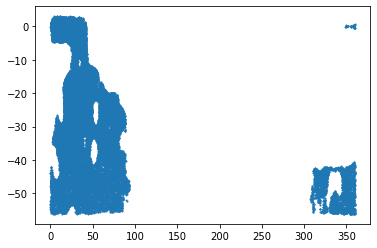

In [23]:
plt.scatter(ra_og,dec_og, s=1)

In [33]:
print(dbin_select)

0


In [34]:
# get clusters that were originally in that redshift range
from astropy.cosmology import Planck18 as cosmo, z_at_value
from astropy import units as u
og_ncl = len(ra_og[(z_og > z_at_value(cosmo.comoving_distance, dbins[dbin_select][0]*u.Mpc))&(z_og < z_at_value(cosmo.comoving_distance, dbins[dbin_select][1]*u.Mpc))])
print(len(ra_d)/og_ncl*100, "% of the original peaks were retained after the cuts")

21.381306865177834 % of the original peaks were retained after the cuts


In [37]:
.4*53610+32176

53620.0

In [35]:
(21+22+19.5+16.7)/4

19.8

In [ ]:
32176

In [ ]:
# combine the data
comb_d = np.column_stack((z_d,richness_d,nu_d,x_d,e_d))


In [ ]:
# # make a pandas dataframe for each of the qualities
# import pandas as pd
# df_z0 = pd.DataFrame([comb_b[:,0], comb_c[:,0], comb_d[:,0]], index=["Buzzard", "Cardinal", "DES"]).T
# df_lambda0 = pd.DataFrame([comb_b[:,1], comb_c[:,1], comb_d[:,1]], index=["Buzzard", "Cardinal", "DES"]).T
# df_nu0 = pd.DataFrame([comb_b[:,2], comb_c[:,2], comb_d[:,2]], index=["Buzzard", "Cardinal", "DES"]).T
# df_x0 = pd.DataFrame([comb_b[:,3], comb_c[:,3], comb_d[:,3]], index=["Buzzard", "Cardinal", "DES"]).T
# df_e0 = pd.DataFrame([comb_b[:,4], comb_c[:,4], comb_d[:,4]], index=["Buzzard", "Cardinal", "DES"]).T
# # cut the e values that are > 2
# df_e0 = df_e0[df_e0 < 2]

In [ ]:
# df_z1 = pd.DataFrame([comb_b[:,0], comb_c[:,0], comb_d[:,0]], index=["Buzzard", "Cardinal", "DES"]).T
# df_lambda1 = pd.DataFrame([comb_b[:,1], comb_c[:,1], comb_d[:,1]], index=["Buzzard", "Cardinal", "DES"]).T
# df_nu1 = pd.DataFrame([comb_b[:,2], comb_c[:,2], comb_d[:,2]], index=["Buzzard", "Cardinal", "DES"]).T
# df_x1 = pd.DataFrame([comb_b[:,3], comb_c[:,3], comb_d[:,3]], index=["Buzzard", "Cardinal", "DES"]).T
# df_e1 = pd.DataFrame([comb_b[:,4], comb_c[:,4], comb_d[:,4]], index=["Buzzard", "Cardinal", "DES"]).T
# # cut the e values that are > 2
# df_e1 = df_e1[df_e1 < 2]


In [ ]:
# # make a pandas dataframe for each of the qualities
# df_z2 = pd.DataFrame([comb_b[:,0], comb_c[:,0], comb_d[:,0]], index=["Buzzard", "Cardinal", "DES"]).T
# df_lambda2 = pd.DataFrame([comb_b[:,1], comb_c[:,1], comb_d[:,1]], index=["Buzzard", "Cardinal", "DES"]).T
# df_nu2 = pd.DataFrame([comb_b[:,2], comb_c[:,2], comb_d[:,2]], index=["Buzzard", "Cardinal", "DES"]).T
# df_x2 = pd.DataFrame([comb_b[:,3], comb_c[:,3], comb_d[:,3]], index=["Buzzard", "Cardinal", "DES"]).T
# df_e2 = pd.DataFrame([comb_b[:,4], comb_c[:,4], comb_d[:,4]], index=["Buzzard", "Cardinal", "DES"]).T
# # cut the e values that are > 2
# df_e2 = df_e2[df_e2 < 2]

In [ ]:
# make a pandas dataframe for each of the qualities
import pandas as pd
df_z3 = pd.DataFrame([comb_b[:,0], comb_c[:,0], comb_d[:,0]], index=["Buzzard", "Cardinal", "DES"]).T
df_lambda3 = pd.DataFrame([comb_b[:,1], comb_c[:,1], comb_d[:,1]], index=["Buzzard", "Cardinal", "DES"]).T
df_nu3 = pd.DataFrame([comb_b[:,2], comb_c[:,2], comb_d[:,2]], index=["Buzzard", "Cardinal", "DES"]).T
df_x3 = pd.DataFrame([comb_b[:,3], comb_c[:,3], comb_d[:,3]], index=["Buzzard", "Cardinal", "DES"]).T
df_e3 = pd.DataFrame([comb_b[:,4], comb_c[:,4], comb_d[:,4]], index=["Buzzard", "Cardinal", "DES"]).T
# cut the e values that are > 2
df_e3 = df_e3[df_e3 < 2]

In [ ]:
Ntot_B = [len(df_z0["Buzzard"][~df_z0["Buzzard"].isna()].values), len(df_z1["Buzzard"][~df_z1["Buzzard"].isna()].values), len(df_z2["Buzzard"][~df_z2["Buzzard"].isna()].values), len(df_z3["Buzzard"][~df_z3["Buzzard"].isna()].values)]
Ntot_C = [len(df_z0["Cardinal"][~df_z0["Cardinal"].isna()].values), len(df_z1["Cardinal"][~df_z1["Cardinal"].isna()].values), len(df_z2["Cardinal"][~df_z2["Cardinal"].isna()].values), len(df_z3["Cardinal"][~df_z3["Cardinal"].isna()].values)]
Ntot_D = [len(df_z0["DES"][~df_z0["DES"].isna()].values), len(df_z1["DES"][~df_z1["DES"].isna()].values), len(df_z2["DES"][~df_z2["DES"].isna()].values), len(df_z3["DES"][~df_z3["DES"].isna()].values)]


In [ ]:
Ntot_B, Ntot_C, Ntot_D

In [ ]:
# make truez into a dataframe, it is only for Cardinal
df_truez = [pd.DataFrame(np.array(truez_list[i]).byteswap().newbyteorder()) for i in range(len(truez_list))]
# df_truez_swapped = pd.DataFrame(np.array)

In [ ]:
import h5py 
# get the Buzzard true galaxy z for each bin

print("Maglim Buzzard.")
mask_path = "/mnt/raid-cita/mlokken/data/masks/y3_gold_2.2.1_RING_joint_redmagic_v0.5.1_wide_maglim_v2.2_mask_hpx_4096.fits" # binary
fracmask_path = "/mnt/raid-cita/mlokken/data/masks/y3_gold_2.2.1_RING_joint_redmagic_v0.5.1_wide_maglim_v2.2_mask_fracgood_hpx_4096.fits"
catpath   = "/mnt/raid-cita/mlokken/buzzard/catalogs/"
outpath   = "/mnt/raid-cita/mlokken/buzzard/number_density_maps/maglim/"

mass_str  = ''

z_dnf    = []
z_true = []
catlen = 0
for catfile in os.listdir(catpath):
    if catfile.startswith("maglim_buzz_Ndensity"):
        print(catfile)
        with fits.open(os.path.join(catpath,catfile)) as cat:
            z_dnf.extend(cat[1].data['DNF_ZMEAN'])
            z_true.extend(cat[1].data['Z'])
            catlen+= len(cat[1].data)

z_dnf   = np.asarray(z_dnf)
z_true = np.asarray(z_true)

In [ ]:
2000/len(z_true[inbin1])*100

In [ ]:
# make a dataframe of the true z values given DNF z bins
zbins = [0.20,0.36], [0.36,0.53], [0.53,0.72], [0.72,0.94] # the z bins for number density maps

inbin1 = (z_dnf > zbins[0][0]) & (z_dnf < zbins[0][1])
inbin2 = (z_dnf > zbins[1][0]) & (z_dnf < zbins[1][1])
inbin3 = (z_dnf > zbins[2][0]) & (z_dnf < zbins[2][1])
inbin4 = (z_dnf > zbins[3][0]) & (z_dnf < zbins[3][1])

# get a sample of 1% of the galaxies in each bin
ztrue_inbin1 = np.random.choice(z_true[inbin1], 2000, replace=False)
ztrue_inbin2 = np.random.choice(z_true[inbin2], 2000, replace=False)
ztrue_inbin3 = np.random.choice(z_true[inbin3], 2000, replace=False)
ztrue_inbin4 = np.random.choice(z_true[inbin4], 2000, replace=False)

df_truez_gals = pd.DataFrame([ztrue_inbin1, ztrue_inbin2, ztrue_inbin3, ztrue_inbin4]).T
# [pd.DataFrame(np.array(truez_list[i]).byteswap().newbyteorder()) for i in range(len(truez_list))]

In [ ]:
# set size of labels
plt.rcParams.update({'font.size': 18})
# for each of 4 dbins (one per column), sns kdeplot for each of the 4 main qualities
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import ticker


fig, ax = plt.subplots(4, 4, figsize=(20,20), sharey='row', sharex='row')

allz = [df_z0, df_z1, df_z2, df_z3]
alle = [df_e0, df_e1, df_e2, df_e3]
allnu = [df_nu0, df_nu1, df_nu2, df_nu3]
allrich = [df_lambda0, df_lambda1, df_lambda2, df_lambda3]
xlabels = ['$z$', r'log$_{{10}}(\lambda$)', r'$\nu$', '$e$']

for i in range(4):
    
    for j in range(4):
        sns.kdeplot(data=df_truez_gals[i], fill=False, common_norm=False, ax=ax[0,j], color='0.6', bw_adjust=.4, linestyle='dashed', zorder=20)
    sns.kdeplot(data=allz[i], fill=True, common_norm=False, ax=ax[0,i], palette=['orange', 'gray', 'blue'], hue_order=["Cardinal", "Buzzard", "DES"], bw_adjust=.4)
    sns.kdeplot(data=np.log10(allrich[i]), fill=True, common_norm=False, ax=ax[1,i], palette=['orange', 'gray', 'blue'], hue_order=["Cardinal", "Buzzard", "DES"], bw_adjust=.4)
    sns.kdeplot(data=allnu[i][allnu[i]!=0], fill=True, common_norm=False, ax=ax[2,i], palette=['orange', 'gray', 'blue'], hue_order=["Cardinal", "Buzzard", "DES"], bw_adjust=.4)
    sns.kdeplot(data=alle[i], fill=True, common_norm=False, ax=ax[3,i], palette=['orange', 'gray', 'blue'], hue_order=["Cardinal", "Buzzard", "DES"], bw_adjust=.4)
    ax[i,0].set_xlabel(xlabels[i])
    ax[i,1].set_xlabel(xlabels[i])
    ax[i,2].set_xlabel(xlabels[i])
    ax[i,3].set_xlabel(xlabels[i])
    ax[i,0].set_ylabel("Density")
    ax[i,0].set_ylabel("Density")
    ax[i,0].set_ylabel("Density")
    ax[i,0].set_ylabel("Density")
for i in range(4):
    # get rid of all the y tick labels
    ax[i,0].set_yticklabels([])
    for col in range(1,4):
        ax[i,col].set_ylabel("")
    
    # 4 ticks and 4 labels always
    # xmin, xmax = ax[i,col].get_xlim()
    # x_range = xmax - xmin
    # tick_spacing = x_range / 9  # Calculate spacing between ticks
    # xticks = np.linspace(xmin + tick_spacing, xmax - tick_spacing, 4)  # Calculate tick positions
    # xticks = np.linspace(ax[i,col].get_xlim()[0], ax[i,col].get_xlim()[1], 4)
    xticks = ticker.MaxNLocator(5)
    for col in range(4):
        ax[i,col].xaxis.set_major_locator(xticks)
        # ax[i,col].xaxis.set_ticks(xticks)
        # ax[i,col].get_xaxis().set_major_formatter(ticker.StrMethodFormatter("{x:.2f}"))  # optional formatting for ticks labels
        # rotate the tick labels
        if i==1:
            ax[i,col].tick_params(axis='x', rotation=45)
        # remove the legends
        ax[i,col].get_legend().remove()

# set the legend by hand
import matplotlib.patches as mpatches
blue_patch = mpatches.Patch(color='blue', label='DES', alpha=.5)
gray_patch = mpatches.Patch(color='gray', label='Buzzard', alpha=.5)
orange_patch = mpatches.Patch(color='orange', label='Cardinal', alpha=.5)
import matplotlib.lines as mlines
dashed_line = mlines.Line2D([], [], color='black', linestyle='dashed', label=r'Buzzard galaxy true $z$', alpha=.6)
plt.legend(handles=[blue_patch, gray_patch, orange_patch, dashed_line], loc=[-2.3,4.85], fontsize=18, ncol=4, framealpha=1)

# add vertical spacing between subplots
plt.subplots_adjust(hspace=0.35, wspace=0.0)
# set redshift title for column
# add the totals for each catalog per dbin to the top of each column
for i in range(4):
    ax[0,i].text(0.5, 1.05, f"$N$ = {Ntot_B[i]},", horizontalalignment='center', verticalalignment='center', transform=ax[0,i].transAxes, fontsize=18, color='gray')
    ax[0,i].text(0.8, 1.05, f"$N$ = {Ntot_C[i]}", horizontalalignment='center', verticalalignment='center', transform=ax[0,i].transAxes, fontsize=18, color='orange')
    ax[0,i].text(0.18, 1.05, f"$N$ = {Ntot_D[i]},", horizontalalignment='center', verticalalignment='center', transform=ax[0,i].transAxes, fontsize=18, color='blue')
    
ax[0,0].set_title('0.21 < $z$ < 0.34', pad=30, fontweight='bold')
ax[0,1].set_title('0.37 < $z$ < 0.51', pad=30, fontweight='bold')
ax[0,2].set_title('0.54 < $z$ < 0.70', pad=30, fontweight='bold')
ax[0,3].set_title('0.74 < $z$ < 0.92', pad=30, fontweight='bold')
ax[0,0].text(-3.2, 0.5, "Cluster redshift", horizontalalignment='center', verticalalignment='center', transform=ax[0,3].transAxes, rotation='vertical', weight='extra bold', fontsize=18)
ax[1,0].text(-3.2, -.8, "Cluster richness", horizontalalignment='center', verticalalignment='center', transform=ax[0,3].transAxes, rotation='vertical', weight='extra bold', fontsize=18)
ax[2,0].text(-3.2, -2.1, "Field excursion", horizontalalignment='center', verticalalignment='center', transform=ax[0,3].transAxes, rotation='vertical', weight='extra bold', fontsize=18)
ax[3,0].text(-3.2, -3.4, "Field ellipticity", horizontalalignment='center', verticalalignment='center', transform=ax[0,3].transAxes, rotation='vertical', weight='extra bold', fontsize=18)
plt.savefig("../plots/paper2/multiscale_properties_allz_cc.pdf", bbox_inches='tight')

In [ ]:
plt.hist(e_b, bins=np.linspace(0,1,100), alpha=0.5, label="Buzzard", density=False)
plt.hist(e_c, bins=np.linspace(0,1,100), alpha=0.5, label="Cardinal", density=False)
plt.hist(e_d, bins=np.linspace(0,1,100), alpha=0.5, label="DES", density=False)
plt.legend()
plt.title("Eccentricity")
plt.show()

plt.hist(x_b, bins=np.linspace(0,10,100), alpha=0.5, label="Buzzard", density=True)
plt.hist(x_c, bins=np.linspace(0,10,100), alpha=0.5, label="Cardinal", density=True)
plt.hist(x_d, bins=np.linspace(0,10,100), alpha=0.5, label="DES", density=True)

plt.legend()
plt.title("$x$")
plt.show()

plt.hist(nu_b, bins=np.linspace(0,10,100), alpha=0.5, label="Buzzard", density=True)
plt.hist(nu_c, bins=np.linspace(0,10,100), alpha=0.5, label="Cardinal", density=True)
plt.hist(nu_d, bins=np.linspace(0,10,100), alpha=0.5, label="DES", density=True)
plt.legend()
plt.title(r"$\nu$")
plt.show()

plt.hist(richness_b, bins=np.linspace(0,100,100), alpha=0.5, label="Buzzard", density=True)
plt.hist(richness_c, bins=np.linspace(0,100,100), alpha=0.5, label="Cardinal", density=True)
plt.hist(richness_d, bins=np.linspace(0,100,100), alpha=0.5, label="DES", density=True)
plt.legend()

plt.title("Richness")
plt.show()

plt.hist(z_b, bins=np.linspace(0,1,100), alpha=0.5, label="Buzzard", density=True)
plt.hist(z_c, bins=np.linspace(0,1,100), alpha=0.5, label="Cardinal", density=True)
plt.hist(z_d, bins=np.linspace(0,1,100), alpha=0.5, label="DES", density=True)
plt.legend()
plt.title("Redshift")

plt.show()


In [ ]:
# first combine the peak array with e, x, nu with richness and z
comb = np.column_stack((allz_peaks_info_sorted[:,3], allz_peaks_info_sorted[:,4], allz_peaks_info_sorted[:,5], richness, z))
# save the combined array
np.save(outpath + f"/peaks_info_{dbins[dbin_select][0]}_{dbins[dbin_select][1]}_{mode}.npy", comb)

In [ ]:
print(outpath + f"/peaks_info_{dbins[dbin_select][0]}_{dbins[dbin_select][1]}_{mode}.npy")

In [ ]:
import corner

# first combine the peak array with e, x, nu with richness and z
comb = np.column_stack(id, (allz_peaks_info_sorted[:,3], allz_peaks_info_sorted[:,4], allz_peaks_info_sorted[:,5], richness, z))
# now plot the distributions of e, x, nu, richness, z
labels = [r'$e$', r'$x$', r'$\nu$', r'$\lambda$', r'$z$']
fig = corner.corner(comb, labels=labels, quantiles=[0.16, 0.5, 0.84], show_titles=True, title_kwargs={"fontsize": 12})
# add buzzard in diff color
corner.corner(np.column_stack((e_buzz, x_buzz, nu_buzz, richness_buzz, z_buzz)), labels=labels, quantiles=[0.16, 0.5, 0.84], show_titles=True, title_kwargs={"fontsize": 12}, fig=fig, color="orange")
# plt.savefig("/home/mlokken/oriented_stacking/plots/corner_plot_{dbins[dbin_select][0]}_{dbins[dbin_select][1]}_{mode}.png")



# plt.savefig(outpath+"corner_plot.png")


In [ ]:
from astropy.io import fits

pk = fits.open(outpath+"redmapper_lambdagt20_893_993Mpc_nugt2_egtpt3_20pt0_orientXYUP_75pct_maglim_843_1043Mpc_pks.fits")
print(pk[0].data)

In [ ]:
# load things from here

cardinal1 = np.load("/mnt/scratch-lustre/mlokken/stacking/Cardinal_paper2/orient_by_maglim_75/peaks_info_rm_lgt20_nugt2_egtpt3_20Mpc_893_1393Mpc_Cardinal.npy")
cardinal2 = np.load("/mnt/scratch-lustre/mlokken/stacking/Cardinal_paper2/orient_by_maglim_75/peaks_info_rm_lgt20_nugt2_egtpt3_20Mpc_1493_1993Mpc_Cardinal.npy")
cardinal3 = np.load("/mnt/scratch-lustre/mlokken/stacking/Cardinal_paper2/orient_by_maglim_75/peaks_info_rm_lgt20_nugt2_egtpt3_20Mpc_2093_2593Mpc_Cardinal.npy")
cardinal4 = np.load("/mnt/scratch-lustre/mlokken/stacking/Cardinal_paper2/orient_by_maglim_75/peaks_info_rm_lgt20_nugt2_egtpt3_20Mpc_2693_3193Mpc_Cardinal.npy")
buzzard = np.load("/mnt/scratch-lustre/mlokken/stacking/Buzzard_paper2/orient_by_maglim_75/peaks_info_rm_lgt20_nugt2_egtpt3_20Mpc_893_1393Mpc_Buzzard.npy")
nu_c1, e_c1, x_c1, richness_c1, z_c1 = cardinal1[:,2], cardinal1[:,0], cardinal1[:,1], cardinal1[:,3], cardinal1[:,4]
nu_c2, e_c2, x_c2, richness_c2, z_c2 = cardinal2[:,2], cardinal2[:,0], cardinal2[:,1], cardinal2[:,3], cardinal2[:,4]
nu_c3, e_c3, x_c3, richness_c3, z_c3 = cardinal3[:,2], cardinal3[:,0], cardinal3[:,1], cardinal3[:,3], cardinal3[:,4]
nu_c4, e_c4, x_c4, richness_c4, z_c4 = cardinal4[:,2], cardinal4[:,0], cardinal4[:,1], cardinal4[:,3], cardinal4[:,4]
nu_b, e_b, x_b, richness_b, z_b = buzzard[:,2], buzzard[:,0], buzzard[:,1], buzzard[:,3], buzzard[:,4]

In [ ]:
# histogram e, x, nu, richness, z with smooth KDE
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
sns.set_context("talk")
sns.kdeplot(e_c, label="Cardinal", color="blue")
# add buzzard in diff color
sns.kdeplot(e_b, label="Buzzard", color="orange")
plt.legend()
plt.title("Eccentricity")
plt.show()
sns.kdeplot(x_c, label="Cardinal", color="blue")
sns.kdeplot(x_b, label="Buzzard", color="orange")
plt.legend()
plt.title("$x$")
plt.show()
sns.kdeplot(nu_c, label="Cardinal", color="blue")
sns.kdeplot(nu_b, label="Buzzard", color="orange")
plt.legend()
plt.title(r"$\nu$")
plt.show()
sns.kdeplot(richness_c, label="Cardinal", color="blue")
sns.kdeplot(richness_b, label="Buzzard", color="orange")
plt.legend()
plt.title("Richness")
plt.show()
sns.kdeplot(z_c, label="Cardinal", color="blue")
sns.kdeplot(z_b, label="Buzzard", color="orange")
plt.legend()
plt.title("Redshift")
plt.show()

In [ ]:
# bin 2
# histogram e, x, nu, richness, z with smooth KDE
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
sns.set_context("talk")
sns.kdeplot(e_c2, label="Cardinal", color="blue")
# add buzzard in diff color
sns.kdeplot(e_b, label="Buzzard", color="orange")
plt.legend()
plt.title("Eccentricity")
plt.show()
sns.kdeplot(x_c2, label="Cardinal", color="blue")
sns.kdeplot(x_b, label="Buzzard", color="orange")
plt.legend()
plt.title("$x$")
plt.show()
sns.kdeplot(nu_c2, label="Cardinal", color="blue")
sns.kdeplot(nu_b, label="Buzzard", color="orange")
plt.legend()
plt.title(r"$\nu$")
plt.show()
sns.kdeplot(richness_c2, label="Cardinal", color="blue")
sns.kdeplot(richness_b, label="Buzzard", color="orange")
plt.legend()
plt.title("Richness")
plt.show()
sns.kdeplot(z_c2, label="Cardinal", color="blue")
sns.kdeplot(z_b, label="Buzzard", color="orange")
plt.legend()
plt.title("Redshift")
plt.show()